In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv("churn_clean.csv")

In [29]:
columns = ["Age", "Income","MonthlyCharge", "Tenure", "Outage_sec_perweek","Bandwidth_GB_Year", "Email","Yearly_equip_failure","Gender","Contract", "Area","Marital", "InternetService","PaperlessBilling", "Churn"]
num_col = ["Age", "Income","MonthlyCharge", "Tenure", "Outage_sec_perweek","Bandwidth_GB_Year", "Email","Yearly_equip_failure"]

In [30]:
updated_data = data[columns]
updated_data

,Age,Income,MonthlyCharge,Tenure,Outage_sec_perweek,Bandwidth_GB_Year,Email,Yearly_equip_failure,Gender,Contract,Area,Marital,InternetService,PaperlessBilling,Churn
0,68,28561.99,172.455519,6.795513,7.978323,904.536110,10,1,Male,One year,Urban,Widowed,Fiber Optic,Yes,No
1,27,21704.77,242.632554,1.156681,11.699080,800.982766,12,1,Female,Month-to-month,Urban,Married,Fiber Optic,Yes,Yes
2,50,9609.57,159.947583,15.754144,10.752800,2054.706961,9,1,Female,Two Year,Urban,Widowed,DSL,Yes,No
3,48,18925.23,119.956840,17.087227,14.913540,2164.579412,15,0,Male,Two Year,Suburban,Married,DSL,Yes,No
4,83,40074.19,149.948316,1.670972,8.147417,271.493436,16,1,Male,Month-to-month,Suburban,Separated,Fiber Optic,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,23,55723.74,159.979400,68.197130,9.415935,6511.252601,12,0,Male,Month-to-month,Rural,Married,DSL,No,No
9996,48,34129.34,207.481100,61.040370,6.740547,5695.951810,15,0,Male,Two Year,Rural,Divorced,Fiber Optic,No,No
9997,48,45983.43,169.974100,47.416890,6.590911,4159.305799,10,0,Female,Month-to-month,Rural,Never Married,Fiber Optic,Yes,No
9998,39,16667.58,252.624000,71.095600,12.071910,6468.456752,14,0,Male,Two Year,Urban,Separated,Fiber Optic,Yes,No


In [31]:
updated_data.duplicated().sum()

0

In [32]:
updated_data.isna().sum()

Age                        0
Income                     0
MonthlyCharge              0
Tenure                     0
Outage_sec_perweek         0
Bandwidth_GB_Year          0
Email                      0
Yearly_equip_failure       0
Gender                     0
Contract                   0
Area                       0
Marital                    0
InternetService         2129
PaperlessBilling           0
Churn                      0
dtype: int64

In [33]:
updated_data = updated_data.fillna("None")
updated_data.isna().sum()

Age                     0
Income                  0
MonthlyCharge           0
Tenure                  0
Outage_sec_perweek      0
Bandwidth_GB_Year       0
Email                   0
Yearly_equip_failure    0
Gender                  0
Contract                0
Area                    0
Marital                 0
InternetService         0
PaperlessBilling        0
Churn                   0
dtype: int64

In [34]:
updated_data.describe()

,Age,Income,MonthlyCharge,Tenure,Outage_sec_perweek,Bandwidth_GB_Year,Email,Yearly_equip_failure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.078400,39806.926771,172.624816,34.526188,10.001848,3392.341550,12.016000,0.398000
std,20.698882,28199.916702,42.943094,26.443063,2.976019,2185.294852,3.025898,0.635953
min,18.000000,348.670000,79.978860,1.000259,0.099747,155.506715,1.000000,0.000000
25%,35.000000,19224.717500,139.979239,7.917694,8.018214,1236.470827,10.000000,0.000000
50%,53.000000,33170.605000,167.484700,35.430507,10.018560,3279.536903,12.000000,0.000000
75%,71.000000,53246.170000,200.734725,61.479795,11.969485,5586.141370,14.000000,1.000000
max,89.000000,258900.700000,290.160419,71.999280,21.207230,7158.981530,23.000000,6.000000


In [35]:

scaler = StandardScaler()
scaled = scaler.fit_transform(updated_data[num_col])


In [36]:
updated_data[num_col]= pd.DataFrame(scaled, columns= num_col)
updated_data

,Age,Income,MonthlyCharge,Tenure,Outage_sec_perweek,Bandwidth_GB_Year,Email,Yearly_equip_failure,Gender,Contract,Area,Marital,InternetService,PaperlessBilling,Churn
0,0.720925,-0.398778,-0.003943,-1.048746,-0.679978,-1.138487,-0.666282,0.946658,Male,One year,Urban,Widowed,Fiber Optic,Yes,No
1,-1.259957,-0.641954,1.630326,-1.262001,0.570331,-1.185876,-0.005288,0.946658,Female,Month-to-month,Urban,Married,Fiber Optic,Yes,Yes
2,-0.148730,-1.070885,-0.295225,-0.709940,0.252347,-0.612138,-0.996779,0.946658,Female,Two Year,Urban,Widowed,DSL,Yes,No
3,-0.245359,-0.740525,-1.226521,-0.659524,1.650506,-0.561857,0.986203,-0.625864,Male,Two Year,Suburban,Married,DSL,Yes,No
4,1.445638,0.009478,-0.528086,-1.242551,-0.623156,-1.428184,1.316700,0.946658,Male,Month-to-month,Suburban,Separated,Fiber Optic,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.453214,0.564456,-0.294484,1.273401,-0.196888,1.427298,-0.005288,-0.625864,Male,Month-to-month,Rural,Married,DSL,No,No
9996,-0.245359,-0.201344,0.811726,1.002740,-1.095915,1.054194,0.986203,-0.625864,Male,Two Year,Rural,Divorced,Fiber Optic,No,No
9997,-0.245359,0.219037,-0.061729,0.487513,-1.146198,0.350984,-0.666282,-0.625864,Female,Month-to-month,Rural,Never Married,Fiber Optic,Yes,No
9998,-0.680187,-0.820588,1.863005,1.383018,0.695616,1.407713,0.655706,-0.625864,Male,Two Year,Urban,Separated,Fiber Optic,Yes,No


In [37]:
yes_no = ["Churn", "PaperlessBilling"]
dummy = ["Gender","Contract", "Area", "InternetService", "Marital"]

In [38]:
updated_data[yes_no] = updated_data[yes_no].replace(["Yes", "No"], [1,0])

In [39]:
updated_data = pd.get_dummies(updated_data, columns= dummy, dtype=int)
updated_data

,Age,Income,MonthlyCharge,Tenure,Outage_sec_perweek,Bandwidth_GB_Year,Email,Yearly_equip_failure,PaperlessBilling,Churn,...,Area_Suburban,Area_Urban,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed
0,0.720925,-0.398778,-0.003943,-1.048746,-0.679978,-1.138487,-0.666282,0.946658,1,0,...,0,1,0,1,0,0,0,0,0,1
1,-1.259957,-0.641954,1.630326,-1.262001,0.570331,-1.185876,-0.005288,0.946658,1,1,...,0,1,0,1,0,0,1,0,0,0
2,-0.148730,-1.070885,-0.295225,-0.709940,0.252347,-0.612138,-0.996779,0.946658,1,0,...,0,1,1,0,0,0,0,0,0,1
3,-0.245359,-0.740525,-1.226521,-0.659524,1.650506,-0.561857,0.986203,-0.625864,1,0,...,1,0,1,0,0,0,1,0,0,0
4,1.445638,0.009478,-0.528086,-1.242551,-0.623156,-1.428184,1.316700,0.946658,0,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.453214,0.564456,-0.294484,1.273401,-0.196888,1.427298,-0.005288,-0.625864,0,0,...,0,0,1,0,0,0,1,0,0,0
9996,-0.245359,-0.201344,0.811726,1.002740,-1.095915,1.054194,0.986203,-0.625864,0,0,...,0,0,0,1,0,1,0,0,0,0
9997,-0.245359,0.219037,-0.061729,0.487513,-1.146198,0.350984,-0.666282,-0.625864,1,0,...,0,0,0,1,0,0,0,1,0,0
9998,-0.680187,-0.820588,1.863005,1.383018,0.695616,1.407713,0.655706,-0.625864,1,0,...,0,1,0,1,0,0,0,0,1,0


In [40]:
# To CSV
updated_data.to_csv("updated_data.csv")

In [41]:
y = updated_data["Churn"]
X = pd.DataFrame(updated_data).drop(columns= "Churn")

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [43]:
X_train.to_csv("X_train.csv")
X_test.to_csv("X_test.csv")
y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")

In [44]:
knn_model = KNeighborsClassifier(n_neighbors= 5).fit(X_train, y_train)

In [45]:
y_pred = knn_model.predict(X_test)
y_pred_train = knn_model.predict(X_train)
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [46]:
accuracy1 = accuracy_score(y_test, y_pred)
accuracy2 = accuracy_score(y_train, y_pred_train)

precision1 = precision_score(y_test, y_pred)
precision2 = precision_score(y_train, y_pred_train)

recall1 = recall_score(y_test, y_pred)
recall2 = recall_score(y_train, y_pred_train)

f1 = f1_score(y_test, y_pred)
f2 = f1_score(y_train, y_pred_train)

roc_auc1 = roc_auc_score(y_test, y_pred)
roc_auc2 = roc_auc_score(y_train, y_pred_train)

In [47]:
print(f"Accuracy Train: {accuracy2:.2f}, Test {accuracy1:.2f}")
print(f"Precision Train: {precision2:.2f}, Test {precision1:.2f}")
print(f"Recall Train: {recall2:.2f}, Test {recall1:.2f}")
print(f"F1 Train: {f2:.2f}, Test {f1:.2f}")
print(f"ROC AUC Train: {roc_auc2:.2f}, Test {roc_auc1:.2f}")

Accuracy Train: 0.90, Test 0.85
Precision Train: 0.84, Test 0.75
Recall Train: 0.76, Test 0.68
F1 Train: 0.79, Test 0.71
ROC AUC Train: 0.85, Test 0.80


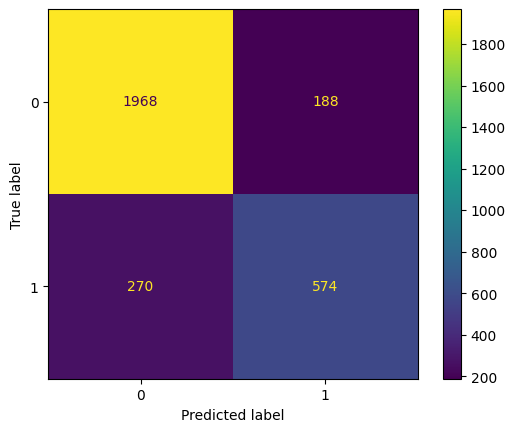

In [48]:
cm1 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=[0,1])
disp.plot()
plt.show()

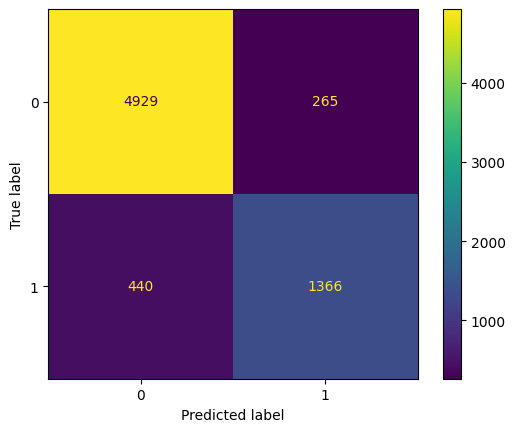

In [49]:
cm2 = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0,1])
disp.plot()
plt.show()

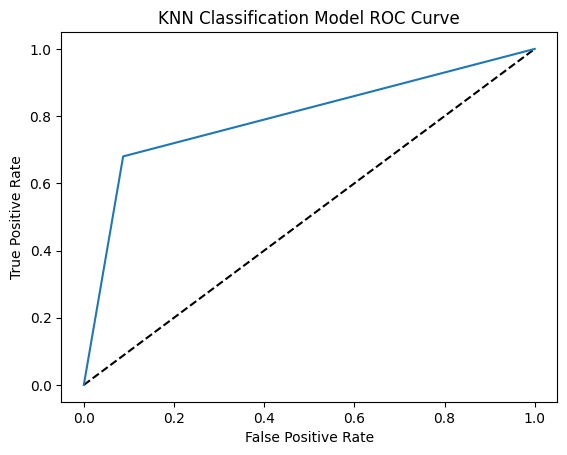

In [50]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN Classification Model ROC Curve")
plt.show()

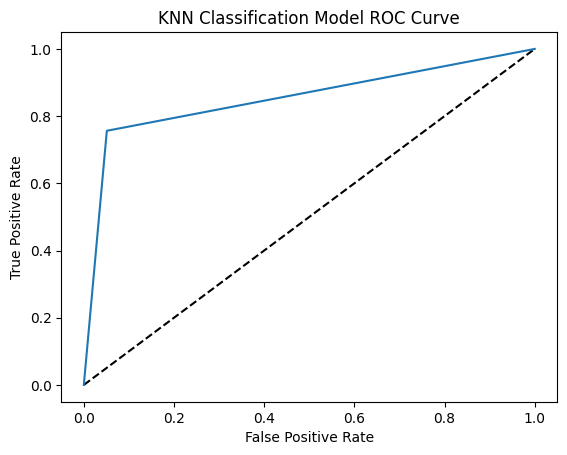

In [51]:
fpr1, tpr1, threshold1 = roc_curve(y_train, y_pred_train)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1,tpr1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN Classification Model ROC Curve")
plt.show()

In [52]:
TP = cm2[1][1]
TN = cm2[0][0]
FP = cm2[0][1]
FN = cm2[1][0]
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2* ((precision * recall) / (precision + recall))